## ASTR 2100, Winter 2020

## Homework Assignment 2 (70 points + 10 extra-credit points)

### Distributed: Monday, January 27

### Due: Wednesday,  Feb 5 at 11:59pm 

#### Exercises you need to do for the assignment grade are tasks in Exercises 1 and 2 along with relative difficulty of each task in the exercise denoted by associated points
#### Optional exercises are marked as extra-credit

#### Please submit you notebook (i.e. its *.ipynb file) as an attachment via Canvas. You can also attach other files, if needed to your submission. Make sure that all of the cells in the notebook have output that you want, when you run all cells just before the submission


#### Jupyter notebooks with class notes and assignments: https://github.com/a-kravtsov/a211w20

#### Slack workspace for this class: https://a211w20.slack.com


#### Instructor: Andrey Kravtsov (kravtsov@uchicago.edu)

#### TAs: Dimitrios Tanoglidis (dtanoglidis@uchicaago.edu), Georgios Zakharegkas (gzakharegkas@uchicago.edu)

In [1]:
#import necessary modules and functions
import numpy as np
import scipy
from scipy.integrate import romberg

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plot_utils import plot_pretty
from codes.plot_utils import plot_line_points
plot_pretty(fontsize=12)


# read in function that will be used for this exercise
k, Pk = np.loadtxt('data/test_matterpower_logintk1000.dat', usecols=(0, 1),  unpack=True)

# their log10 values that will be used 
lk, lPk = np.log10(k), np.log10(Pk)


## Exercise 1: Using splines for interpolation and estimates of  derivatives and integrals
### (40 points)




**Task 1a. (10 points)** Based on the code in the 03 notebook reproduced above, write a function that constructs interpolating (using <tt>np.linalg.solve</tt>) or approximating (using <tt>np.linalg.lstsq</tt>) polynomial for input vector of test points and corresponding tabulated function values.

In [2]:
def poly_approx(xtr, ftr, xt, method='interpolation', poly_order=1):
    """
    function constructing an approximating polynomial for the input 
    vector of training values of the approximated function ftr, 
    tabulated at the vector of training points xtr and compute the values
    of constructed polynomial at the input vector of test values xt

    Parameters:
    -----------
    xtr, ftr: array like
                vectors of training points and tabulated function values
    xt: array like
                vector of test points
    method: string
            defining the method to be used in construction of the polynomial
            'interpolation' - construct interpolating polynomial using np.linalg.solve
            'regression' - construct approximating polynomial np.linalg.lstsq
    poly_order: integer
                order of the approximating polynomial. This parameter is ignored
                for method='interpolation', but is used for 'regression'
                must be 0<=poly_order<=np.size(xtr)
    Returns:
    --------
    ft: array like
        values of the polynomial at xt 
    a:  array like
        polynomial coefficients
    """
    ntr = len(xtr) # define number of training set points
     #set up Vandermonde matrix
    if method == 'interpolation':
        V = np.vander(xtr, ntr, increasing=True)
        #print(V[1:10])
        a = np.linalg.solve(V, ftr) # a = V^{-1} ftr
    elif method == 'regression':
        V = np.vander(xtr, poly_order, increasing=True)
        a = np.linalg.lstsq(V, ftr, rcond=None)[0] 
    pfit = np.poly1d(a[::-1]) #define polynomial function poly
    ft = pfit(xt) #evaluate fitting function poly
    return ft, a

In [3]:
# test routine with sin(x)
xmin, xmax, ntr = 0., 2.*np.pi, 20
xtr = np.linspace(xmin, xmax, ntr)
ftr_int = np.sin(xtr)
# this vector is sine function + a little bit of Gaussian random noise (so mimics approximating noisy data)
ftr_fit = np.sin(xtr) + np.random.normal(scale=0.05, size=np.size(xtr))

nt = 1000 # should be different from nt
xt = np.linspace(xmin, xmax, nt)

#Attempt to fit polynomial with interpolation method
poly_int, a_int = poly_approx(xtr, ftr_int, xt, method='interpolation')

#Attempt to fit polynomial with regression method & poly order = 17
poly_order=17
poly_fit, a_fit = poly_approx(xtr, ftr_fit, xt, method='regression', poly_order=poly_order)

When $sin(𝑥)$ is used as a test function, the poly_approx function fits a line that is relatively close to the true data for both the interpolation and regression methods. The fit is slightly worse for the regression method, as the tabulated function values already have some extra Gaussian random noise and the polynomial order is very high (17).

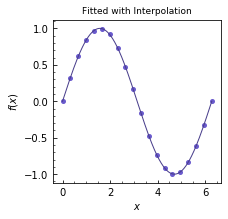

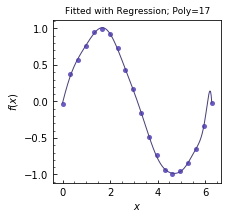

In [4]:
# plot results
plot_line_points(xt, poly_int, xp=xtr, yp=ftr_int, points=True,
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3,
                 plot_title="Fitted with Interpolation")

plot_line_points(xt, poly_fit, xp=xtr, yp=ftr_fit, points=True,
                 xlabel=r'$x$', ylabel=r'$f(x)$',
                 plot_title="Fitted with Regression; Poly=17",figsize=3)

The fit for the interpolationg polynomial is actually relatively similar for successively decreasing $ntr$, starting from 20. Even with the small $ntr$=4, the polynomial still qualitatively looks like a sine, but the interpolation does not really work when ntr=3.

The minimum value of training points ($ntr$ = 4) must be sufficient to indicate at least one maximum and one minimum for the polynomial to still look like a sine, and it seems to require at least two points on either side so that the interpolation can "guess" that there is a local maximum or minimum in between those two points.

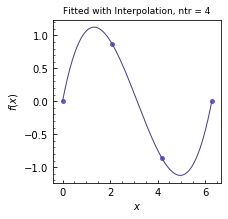

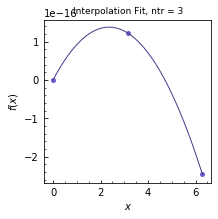

In [5]:
#reset parameters 
xmin, xmax, 0., 2.*np.pi
nt = 1000 # should be different from nt
xt = np.linspace(xmin, xmax, nt) #testing data

ntr = 4
xtr = np.linspace(xmin, xmax, ntr) #training data
ftr_int = np.sin(xtr) #tabulated data 

#Attempt to fit polynomial with interpolation method
poly_int, a_int = poly_approx(xtr, ftr_int, xt, method='interpolation')
plot_line_points(xt, poly_int, xp=xtr, yp=ftr_int, points=True,
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3,
                 plot_title="Fitted with Interpolation, ntr = 4")

ntr = 3
xtr = np.linspace(xmin, xmax, ntr) #training data
ftr_int = np.sin(xtr) #tabulated data 

#Attempt to fit polynomial with interpolation method
poly_int, a_int = poly_approx(xtr, ftr_int, xt, method='interpolation')
plot_line_points(xt, poly_int, xp=xtr, yp=ftr_int, points=True,
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3,
                 plot_title="Interpolation Fit, ntr = 3")

**Task 1b. (5 points)** Now apply the routine you implemented to interpolate $P(k)$ read in below. If you don't manage to get the working implementation in 1a, you can use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html"><tt>np.polyfit</tt></a> routine for this exercise. 

In [6]:
nkt = 1000
kt = np.linspace(k.min(), k.max(), nkt)
print(lk[1:10])
print(lPk[1:10])
print(kt[1:10])
k.min()

[-4.95927902 -4.91624662 -4.87318699 -4.8301493  -4.78712021 -4.74407654
 -4.70103782 -4.65801183 -4.61496601]
[1.80596956 1.84728262 1.88860066 1.92991935 1.97123873 2.01254197
 2.05388479 2.09520423 2.13649861]
[0.01002095 0.02003195 0.03004295 0.04005395 0.05006495 0.06007595
 0.07008695 0.08009796 0.09010896]


9.9467e-06

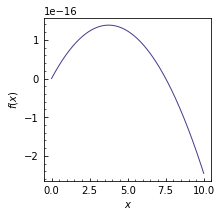

NameError: name 'lkt' is not defined

In [7]:
#interpolate P(k)
poly_pk, a_pk = poly_approx(k, Pk, kt, method='interpolation')
plot_line_points(kt, poly_int, xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)

poly_reg, a_reg = poly_approx(lk, lPk, lkt, method='regression', poly_order=20)
plot_line_points(lkt, poly_reg, xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)

#interpolate log10(k)
lkt = np.linspace(lk.min(), lk.max(), nkt)
poly_intl, a_intl = poly_approx(lk, lPk, lkt, method='interpolation')
#print(poly_intl[1:10])
#print(a_intl[1:10])
plot_line_points(lkt, poly_intl, xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)

#interpolate log10 P(k)
poly_lpk, a_lpk = poly_approx(k, lPk, lkt, method='interpolation')
plot_line_points(lkt, poly_lpk, xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)
#print(poly_lpk[1:10])
#print(a_lpk[1:10])

#regress P(k)

The following code fails since the SVD is not able to converge in Least Squares because the specified degree of the polynomial is the exact same size as the size of the tabulated data (1000), meaning all the points would be some kind of local minima/maxima, so it is not possible to fit.

In [8]:
#attempt poly_approx for training: lk, tabulated: lPk, test: kt
nkt = 1000
kt = np.linspace(k.min(), k.max(), nkt)
poly_int, a_int = poly_approx(lk, lPk, kt, method='regression', poly_order=np.size(kt))

LinAlgError: SVD did not converge in Linear Least Squares

In [9]:
print(a_int, np.size(a_int))

[ 0.00000000e+00  1.16945155e-16 -2.48165326e-17] 3


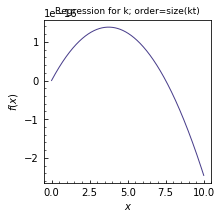

In [10]:
plot_line_points(kt, poly_int, xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3,
                plot_title="Regression for k; order=size(kt)")

What happens? Try doing this for $\log_{10} k$ and $\log_{10} P(k)$ instead of $P(k)$. Then try with regression. 

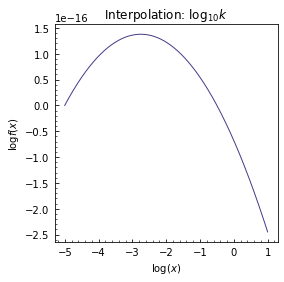

In [11]:
lkt = np.linspace(lk.min(), lk.max(), nkt)
poly_intl, a_intl = poly_approx(lk, lPk, lkt, method='interpolation')
plot_line_points(lkt, poly_int, xlabel=r'$\log(x)$', ylabel=r'$\log f(x)$', figsize=4,
                 plot_title="Interpolation: $\log_{10}k$")

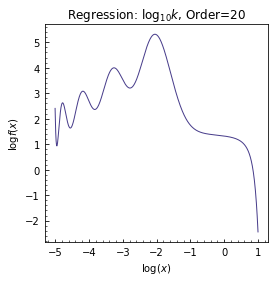

In [12]:
poly_int, a_int = poly_approx(lk, lPk, lkt, method='regression',
                              poly_order=20)
plot_line_points(lkt, poly_int, xlabel=r'$\log(x)$',
                 ylabel=r'$\log f(x)$',
                 figsize=4,
                 plot_title="Regression: $\log_{10}k$, Order=20")

Do you get a sensible result? Think about what the routine is doing and try to come up with an explanation for the outcome of this exercise. (7 points)

The result using the regression method is not sensible because the specified order is too large. When the polynomial order is larger, the algorithm expects to find more minima/maxima but still wants to minimize the overall least squares error (due to the regression method), which results in this oscillating behavior. 

Try regression with smaller poly_order values and find polynomial order for which at least somewhat sensible approximation can be obtained. What is that order? Think about a possible explanation for why this works for small order (3 points). 

The approximations look relatively similar for poly_orders smaller than 18. 


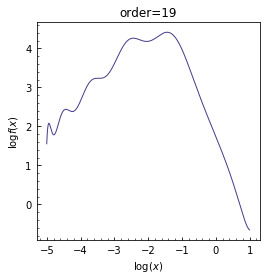

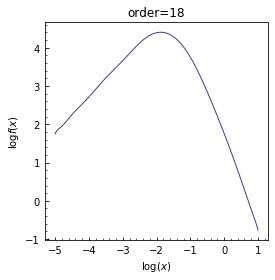

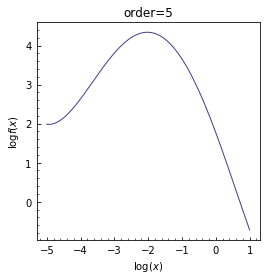

In [13]:
poly_int19, a_int19 = poly_approx(lk, lPk, lkt, method='regression', poly_order=19)
plot_line_points(lkt, poly_int19,
                 xlabel=r'$\log(x)$',
                 plot_title="order=19",
                 ylabel=r'$\log f(x)$', figsize=4)
poly_int18, a_int18 = poly_approx(lk, lPk, lkt, method='regression', poly_order=18)
plot_line_points(lkt, poly_int18,
                 xlabel=r'$\log(x)$',
                 plot_title="order=18",
                 ylabel=r'$\log f(x)$', figsize=4)
poly_int5, a_int5 = poly_approx(lk, lPk, lkt, method='regression', poly_order=5)
plot_line_points(lkt, poly_int5,
                 xlabel=r'$\log(x)$',
                 plot_title="order=5",
                 ylabel=r'$\log f(x)$', figsize=4)

### SciPy routines for spline interpolation and approximation

Spline interpolation is implemented in the SciPy library <a href="http://scipy.github.io/devdocs/interpolate.html"><tt>scipy.interpolate</tt></a> in routines <a href="https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.interpolate.interp1d.html"><tt>interp1d</tt></a> and <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html"><tt>UnivariateSpline</tt></a>. Scipy   has more spline routines for more specialized tasks (see the list <a href="http://scipy.github.io/devdocs/interpolate.html">here</a> and examples of their use <a href="https://docs.scipy.org/doc/scipy-1.0.0/reference/tutorial/interpolate.html">here</a>), but the routines listed here are most frequently used for 1-dimensional function interpolation/approximation. 

<a href="https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.interpolate.interp1d.html"><tt>interp1d</tt></a> is a routine written in python, although parts of it are written in <a href="https://cython.org/">Cython</a> and use a couple of <a href="">Fitpack library routines</a> and can perform only spline interpolation (i.e. approximation matching the function values at the training values to machine precision). 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html"><tt>UnivariateSpline</tt></a> is a class-based python wrapper around routines <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html"><tt>splev</tt></a>, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep"><tt>splrep</tt></a>, and <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep"><tt>splprep</tt></a> that use old, efficient fortran-based Fitpack library of interpolation routines. This function allows construction of the spline that is not interpolating data, but approximating it using the least squares regression discussed in class on Friday. The effective weights of tabulated function data points are set by the input parameter <tt>s</tt>.   

For <tt>s=0</tt> <tt>UnivariateSpline</tt> is equivalent to routine
SciPy <a href="http://scipy.github.io/devdocs/generated/scipy.interpolate.InterpolatedUnivariateSpline.html#scipy.interpolate.InterpolatedUnivariateSpline"><tt>InterpolatedUnivariateSpline</tt></a> that constructs spline that matches the function values at the training points to machine precision.

For <tt>s>0</tt> <tt>UnivariateSpline</tt> constructs spline that satisfies condition for the $N+1$ training points $x_i$:

$$\sum\limits_{i=0}^N w_i [f_i-{\rm spline}(x_i)]^2 \leq s$$

by solving the system of normal equations for the spline coefficients. 

Below are my routines that compute coefficients of the interpolating 
natural cubic spline and the spline itself, given the vector of these coefficients.  

In [18]:
def cubic_spline_coefficients(xi, fi):
    """
    compute coefficients of the interpolating natural cubic spline
    see Appendix in the note for the derivation and details of the algorithm
    
    Parameters: 
        xi, fi: numpy float vectors
                tabulated points and function values
            
    Returns:
        a, b, c, d: numpy float vectors
                cubic spline coefficients 
                dx = x - xi[i]
                fx = a[i] + dx*(b[i] + c[i]*dx + d[i]*dx*dx)

    """
    delx = np.diff(xi); delf = np.diff(fi)
    # form matrices to solve for spline coefficients
    vx = np.zeros_like(xi)
    # form rhs vector using python's array slicing 
    vx[1:-1:] = 3.*(delf[1::]/delx[1::] - delf[:-1:]/delx[:-1:])
    # construct 3 diagonals
    nx = np.size(xi)
    diags = np.zeros((3, nx))
    diags[1,0] = 1.; diags[1,-1] = 1.
    diags[1,1:-1:] = 2. * (delx[1::] + delx[:-1:])
    diags[0,1:] = delx[:]
    diags[2,1:-1] = delx[1:]
    # solve for coefficients c using Thomas algorithm for tri-diagonal matrices
    # see https://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    ac, bc, cc, dc = map(np.array, (diags[0,:], diags[1,:], diags[2,:], vx)) # copy arrays
    for k in range(1, nx):
        mk = ac[k] / bc[k-1]
        bc[k] = bc[k] - mk * cc[k-1] 
        dc[k] = dc[k] - mk * dc[k-1]
    
    c = np.zeros_like(bc)
    c[-1] = dc[-1] / bc[-1]

    for k in range(nx-2, -1, -1):
        c[k] = (dc[k]-cc[k]*c[k+1])/bc[k]

    # now get the rest of the coefficients
    b = delf[::]/delx[::] - (c[1::] + 2.*c[:-1:])*delx[::]/3.
    d = (c[1::] - c[:-1:])/(3.*delx[::]) 
    a = fi
    return a, b, c, d

In [19]:
def cubic_spline(xt, xi, a, b, c, d):
    """
    piecewise linear approximation of f(x) given input of tabulated values of xi and fi
    note that xi are expected in ascending order
    
    Returns:
        vector of spline values at test points x 

    """
    n = np.size(xi) - 1
    fxt = np.empty_like(xt)
    for j, x in enumerate(xt):
        for i in range(n):
            if (x >= xi[i]) and (x <= xi[i+1]):
                # reusing computations is always a good idea, but here we also can return dfdx
                dx = x - xi[i]
                fxt[j] = a[i] + dx*(b[i] + c[i]*dx + d[i]*dx*dx)
        
    return fxt

Here is the test that the spline interpolation produces good results for interpolation of <tt>Plk</tt> as a function of <tt>lk</tt>

In [20]:
lkt = np.linspace(lk.min(), lk.max(), nkt)
a, b, c, d = cubic_spline_coefficients(lk, lPk)
spline_int = cubic_spline(lkt, lk, a, b, c, d)

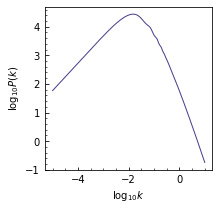

In [21]:
plot_line_points(lkt, spline_int, 
                 xlabel=r'$\log_{10} k$', ylabel=r'$\log_{10} P(k)$', figsize=3)

Note that once we have the spline coefficients for a given interval $a_i$, $b_i$, $c_i$, and $d_i$, we can compute derivatives of the interpolating spline as well as its integral. For interpolating spline 

$$s_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3,$$

we have for derivatives

\begin{eqnarray}
f^\prime(x\in[x_i,x_{i+1}])\approx s^\prime_i(x)&=&b_i + 2c_i(x-x_i)+3d_i(x-x_i)^2,\\
f^{\prime\prime}(x\in[x_i,x_{i+1}])\approx s^{\prime\prime}_i(x)&=&2c_i+6d_i(x-x_i),\\
f^{\prime\prime\prime}(x\in[x_i,x_{i+1}])\approx s^{\prime\prime\prime}_i(x)&=&6d_i
\end{eqnarray}

It is also straightforward to use interpolating spline to estimate the integral of the approximated function. For example, the integral in the interval $[x_i,x_{i+1}]$ (using change of variables $x\rightarrow\xi=x-x_i$:

$$\int\limits_{x_i}^{x_{i+1}}f(x)dx\approx \int\limits_{x_i}^{x_{i+1}}s_i(x)dx = \int\limits_{0}^{x_{i+1}-x_i}s_i(\xi)d\xi=a_i(x_{i+1}-x_i)+\frac{1}{2}b_i(x_{i+1}-x_i)^2+\frac{1}{3}c_i(x_{i+1}-x_i)^3+\frac{1}{4}d_i(x_{i+1}-x_i)^4$$

**Task 1c. (10 points)** Add calculation of the first, second, and third derivatives based on the spline interpolation to the routine <tt>cubic_spline</tt> above (3 points). Write a routine to estimate integral of $f(x)$ in the interval $[a,b]$ using interpolating cubic spline for $f(x)$ and its coefficient vectors $a$, $b$, $c$, $d$. (4 points).

Plot the first three derivatives of $\log_{10} P$ for some function (for example, the sine) and comment on their behavior (smoothness, continuity). Test the accuracy of the integral for a function for which you know the exact answer (e.g., $\sin x$ or $e^x$.) (3 points). 

In [22]:
def my_cubic_spline(xt, xi, a, b, c, d):
    """
    piecewise linear approximation of f(x) given input of tabulated values of xi and fi
    note that xi are expected in ascending order
    
    Returns:
        fxt: vector of spline values at test points x 
        delta: vector of first, second, and third derivatives

    """
    n = np.size(xi) - 1
    #print("n size: ",n)
    fxt = np.empty_like(xt)
    delta1 = np.empty_like(xt)
    delta2 = np.empty_like(xt)
    delta3 = np.empty_like(xt)
    #print("first 10 fxt: ",fxt[:10])
    #print("first 10 xt: ",xt[:10])
    for j, x in enumerate(xt):
        for i in range(n):
            if (x >= xi[i]) and (x <= xi[i+1]):
                # reusing computations is always a good idea, but here we also can return dfdx
                dx = x - xi[i]
                fxt[j] = a[i] + dx*(b[i] + c[i]*dx + d[i]*dx*dx)
                #print("made fxt")
                delta1[j] = b[i] + dx*(2*c[i] + 3*d[i]*dx)
                #print("made delta1")
                delta2[j] = 2*c[i] + 6*d[i]*dx
                delta3[j] = 6*d[i]
    delta = np.array([delta1, delta2, delta3])    
    return fxt, delta

In [24]:
from scipy.integrate import romberg
def my_int(xi, a, b, c, d, start, end):
    n = np.size(xi) - 1
    areas = np.zeros(n)
    
    for i in range(n):
        if (xi[i] >= start) and (xi[i+1] <= end):
            dx = xi[i+1] - xi[i]
            areas[i] = a[i]*dx + 0.5*b[i]*(dx**2.) + (1./3.)*c[i]*(dx**3.)+ 0.25*d[i]*(dx**4.)
    return np.sum(areas)
            
#Testing parameters
nkt = 1000
#generate sin(x) values
xmin, xmax, ntr = 0., np.pi, 1000

#set up xi (tabulated values)
xtr = np.linspace(xmin, xmax, 50)
#l_x = np.log10(xtr[1:]) #don't include 0 

# set up fi (tabulated function values for log10(sin(x)))
sin_ftr = np.sin(xtr)
#l_sin = np.log10(sin_ftr)

#sample points from l_x
kt = np.linspace(xtr.min(), xtr.max(), nkt)

#Test integral function
a, b, c, d = cubic_spline_coefficients(xtr, sin_ftr)
print(my_int(xtr, a, b, c, d, 0, np.pi/2)) #integral should equal 2
print(my_int(xtr, a, b, c, d, 0, np.pi)) #integral should equal 1

0.9679483996788216
1.9999999264865291


Checking that the interpolation works using <tt>my_cubic_spline</tt>...

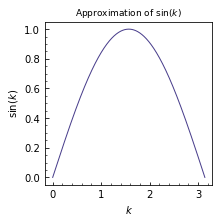

In [25]:
a, b, c, d = cubic_spline_coefficients(xtr, sin_ftr)
spline_int, derivs = my_cubic_spline(kt, xtr, a, b, c, d)

plot_line_points(kt, spline_int, 
                 xlabel=r'$k$',
                 ylabel=r'$\sin(k)$',
                 plot_title='Approximation of $\sin(k)$',figsize=3)

#a, b, c, d = cubic_spline_coefficients(xtr, l_sin)
#spline_int, spline_delt = my_cubic_spline(xtr, l_sin, a, b, c, d)
#plot_line_points(xtr, spline_int, xlabel=r'$k$', ylabel=r'$\log_{10} P(k)$', figsize=3)


Plotting the first three derivatives of $\sin(x)$:

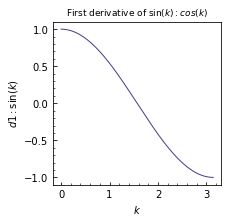

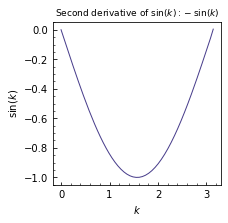

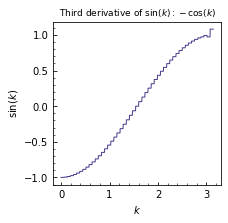

In [26]:
d1 = derivs[0]
d2 = derivs[1]
d3 = derivs[2]
plot_line_points(kt, d1, 
                 xlabel=r'$k$',
                 ylabel=r'$d1: \sin(k)$',
                 plot_title='First derivative of $\sin(k): cos(k)$',figsize=3)

plot_line_points(kt, d2, 
                 xlabel=r'$k$',
                 ylabel=r'$\sin(k)$',
                 plot_title='Second derivative of $\sin(k): -\sin(k)$',figsize=3)

plot_line_points(kt, d3, 
                 xlabel=r'$k$',
                 ylabel=r'$\sin(k)$',
                 plot_title='Third derivative of $\sin(k): -\cos(k)$',figsize=3)

**Task 1d. (5 points)** Suppose we want to compute the *logarithmic slope* of $P(k)$:

$$\frac{d\log_{10}P}{d\log_{10} k}=\frac{d\ln P}{d\ln k}=\frac{k}{P}\,\frac{dP}{dk}.$$

Compute this derivative using your routine implemented in 1c using <tt>lk</tt> and <tt>lPk</tt> vectors and plot this derivative as a function of <tt>lk</tt>. Compare your plot to the left panel of Figure 4 in <a href="https://arxiv.org/pdf/1407.4730">this paper</a>. It should look roughly similar, but with some differences. Describe the differences. Briefly describe what causes them. 

Note that if you don't complete 1c, you can construct spline interpolation of <tt>lk</tt> and <tt>lPk</tt> using SciPy <tt>UnivariateSpline</tt> with <tt>s=0</tt> and use its <tt>derivative()</tt> method to compute the derivative (see Task 1e below). 

In [113]:
#compute logarithmic slope of P(k)
lkt = np.linspace(lk.min(), lk.max(), nkt)
a, b, c, d = cubic_spline_coefficients(lk, lPk)
spline_int, derivs = my_cubic_spline(lkt, lk, a, b, c, d)

dPdk = derivs[0] #first derivative 
n = np.size(lk)


**Task 1e (5 points)** Use SciPy <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html"><tt>UnivariateSpline</tt></a> routine to approximate <tt>lk</tt> and <tt>lPk</tt> and this class'  <tt>derivative()</tt> method to construct approximation for the derivative, as illustrated below, to compute the derivative $$d\log_{10}P/d\log_{10} k$$. Compute and plot the derivative for <tt>s=0.</tt>, <tt>s=0.0001</tt>, <tt>s=0.001</tt>, and <tt>s=0.01</tt> and comment on how the derivative changes for different values of the smoothing parameter <tt>s</tt>. Try to explain the behavior you observe. 

When s=0, the spline will interpolate through all data points. When <tt>s>0</tt>, fewer knots than the number of data points are also allowed. However, when the splines are of a higher order, there are more constraints which causes the additional oscillations observed near points that are equidistant and close to each other which is observed in the second to fourth graphs.

In [27]:
# example of use of derivative method of UnivariateSpline 
from scipy.interpolate import UnivariateSpline

ntr = 4
xtr = np.linspace(0.,2.*np.pi, ntr)
spl = UnivariateSpline(xtr, np.sin(xtr), s=0.) # spline approximating sine
dspl = spl.derivative() # spline approximating dsin(x)/dx=cos(x)

nt = 100
xt = np.linspace(0.,2.*np.pi, nt)

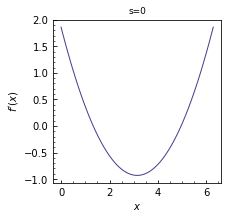

In [28]:
plot_line_points(xt, dspl(xt), xlabel=r'$x$', ylabel=r'$f^\prime(x)$',
                 plot_title='s=0',
                 figsize=3)

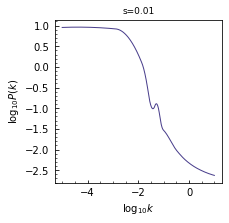

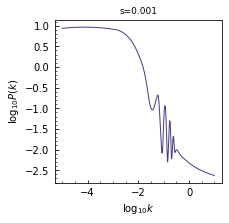

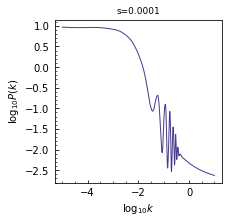

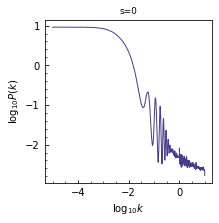

In [35]:
spl = UnivariateSpline(lk, lPk, s=0.01)
dspl = spl.derivative()

plot_line_points(lkt, dspl(lkt), xlabel=r'$\log_{10} k$',
                 ylabel=r'$\log_{10}P(k)$', 
                 plot_title='s=0.01',
                 figsize=3)

spl = UnivariateSpline(lk, lPk, s=0.001)
dspl = spl.derivative()

plot_line_points(lkt, dspl(lkt), xlabel=r'$\log_{10} k$',
                 ylabel=r'$\log_{10}P(k)$', 
                 plot_title='s=0.001',
                 figsize=3)

spl = UnivariateSpline(lk, lPk, s=0.0001)
dspl = spl.derivative()

plot_line_points(lkt, dspl(lkt), xlabel=r'$\log_{10} k$',
                 ylabel=r'$\log_{10}P(k)$', 
                 plot_title='s=0.0001',
                 figsize=3)

spl = UnivariateSpline(lk, lPk, s=0)
dspl = spl.derivative()

plot_line_points(lkt, dspl(lkt), xlabel=r'$\log_{10} k$',
                 ylabel=r'$\log_{10}P(k)$', 
                 plot_title='s=0',
                 figsize=3)

**Task 1f. (5 points)** 

The interpolated spline for $y=\sin(x)$ on the interval $[0,\pi/2]$ computes values of $x$ for $y=1$, $y=0$, $y=0.5$ that are close to the actual output of <tt>np.arcsin</tt> for these values of $y$. 

In [54]:
def interp_spline(fx, a, b, y_vec):
    """
    Parameters: 
        fx: function
        a, b: [min, max] of x range of fx
        y_vec: y values to be interpolated
    Returns:
        x_vec: vector of guessed x values
    """
    nkt = 100
    xtr = np.linspace(a, b, nkt) #training x values
    y = fx(xtr) #y vectors
    spl = UnivariateSpline(y, xtr, s=0) #interpolating spline
    return spl(y_vec)

y_test = np.array([1,0,0.5])
print("Computing x with interpolating spline: \n",
      interp_spline(np.sin, 0, np.pi/2.,y_test))
print("True arcsin(x) values: \n",
      np.arcsin(y_test))

Computing x with interpolating spline: 
 [1.57079633e+00 5.37918039e-20 5.23598776e-01]
True arcsin(x) values: 
 [1.57079633 0.         0.52359878]


## Exercise 2 (30 points)

**Background.** During the last week we saw that computation of the luminosity distance $d_L(z,H_0,\Omega_{\rm m0},\Omega_\Lambda)$ is quite expensive when we need to compute it for many parameter combinations, as is required, for example, when we want to find the combination that describe observational measurements of supernovae type Ia. 

This motivates constructing accurate approximations for $d_L(z,H_0,\Omega_{\rm m0},\Omega_\Lambda)$ using methods that we've been discussing in the last couple of classes (interpolation or regression). The nonlinear dependence of $d_L$ on $z$, $\Omega_{\rm m0}$ and $\Omega_\Lambda$ via the integral (in general case) is particularly important to approximate well, as it cannot be simply obtained by rescaling from results for other model parameters, as can be done for $H_0$.

Indeed, $d_L$ is proportional to $c/H_0$ and this is the only place where $H_0$ appears in its expression. Thus, if we tabulate $\tilde{d}_L$ without  $c/H_0$ factor, it can always be added later to compute the actual value of the luminosity distance $d_L=c/H_0\,\tilde{d}_L(z,\Omega_{\rm m0}, \Omega_\Lambda)$. Given this simple dependence of $d_L$ on $H_0$, there is no need to construct approximation of $d_L$ as a function of $H_0$. We can simply scale it. 

**Goal of the exercise.** The goal of this exercise is for you to find an optimal approximation of $\tilde{d}_L$ (i.e. $d_L$ without $c/H_0$ factor) as a function of $\Omega_{\rm m0}$ and $\Omega_\Lambda$ (that is approximation should be two-dimensional, not two separate 1d approximations as a function of $\Omega_{\rm m0}$ and $\Omega_\Lambda$) for a given single value of $z$. 

"Optimal" here means that provides target accuracy of the approximation with the smallest training set of tabulated function values. Suppose our target fractional accuracy for $\tilde{d}_L$ is $10^{-4}$. Experiment with 2D polynomial and piecewise spline interpolation for $\tilde{d}_L$ with different size of training point set and their spacing along $x$ and $y$ (i.e. along $\Omega_{\rm m0}$ and $\Omega_\Lambda$ in this exercise) using codes and examples below and identify the approach that reaches this target accuracy with the smallest training sample. 

**Task 2a. (15 points)** Write a routine that constructs 2D *spline* approximation of $\tilde{d}_L(z,\Omega_{\rm m0}, \Omega_\Lambda)$ for a given input single value of redshift $z$ and for ranges of the $\Omega_{\rm m0}$ and $\Omega_\Lambda)$ parameters of $\Omega_{\rm m0}\in [0.1]$ and $\Omega_\Lambda\in[0.,1]$. Eperiment with different training point spacings (for example, evenly spaced vs Chebyshev nodes) and try to find the spacing that reaches the target fractional accuracy of $10^{-4}$ with the smallest size of the training set. 

There are several different SciPy routines that can be used for this.  I recommend using routine <tt>scipy.interpolate.RectBivariateSpline(x, y, z, s=0, kx=3, ky=3)</tt>, where $z$ is the array of function values tabulated at training points in vectors $x$ and $y$, $s=0$ indicates interpolation (no smoothing), parameters <tt>kx=3, ky=3</tt> specify that cubic splines should be used in $x$ and $y$ variables. Example of using this function is shown below (you can read about other available options and see examples of how they are used <a href="https://mmas.github.io/interpolation-scipy">here</a>).

Example below uses a numpy function <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html"><tt>np.meshgrid</tt></a> to generate 2D grids of values of $x$ and $y$ from 1D vectors defined using <tt>np.linspace</tt>

In [9]:
# example of how to use it: 2D sine function
def sin2d(x, y):
    return 0.5*(np.sin(x) + np.sin(y))

# training vectors
xmin, xmax, ntr = 0., 2.*np.pi, 10
xtr = np.linspace(xmin, xmax, ntr)
ytr = np.linspace(xmin, xmax, ntr)
# construct grids for x and y using xtr and ytr
xgrid, ygrid = np.meshgrid(xtr, ytr, sparse=False, indexing='ij')
# tabulate test function on this grid
ftr = sin2d(xgrid, ygrid)

# test vectors
nt = 200
xt = np.linspace(xmin, xmax, nt)
yt = np.linspace(xmin, xmax, nt)
# test grid
xgt, ygt = np.meshgrid(xt, yt, sparse=False, indexing='ij')

# construct 2d interpolating cubic spline given training values xtr, ytr, and ftr 
from scipy.interpolate import RectBivariateSpline

spl2d = RectBivariateSpline(xtr, ytr, ftr, s=0, kx=3, ky=3)

ft = spl2d(xt, yt)

In [10]:
print(np.shape(ftr), np.shape(ft))

(10, 10) (200, 200)


Note the dimensions of <tt>ftr</tt> and <tt>ft</tt> generated in the example above. When you work on this exercise, if you use the above example, make sure your function for computing $\tilde{d}_L$ can handle input of 2d grids like <tt>xgrid</tt> and <tt>ygrid</tt>. 

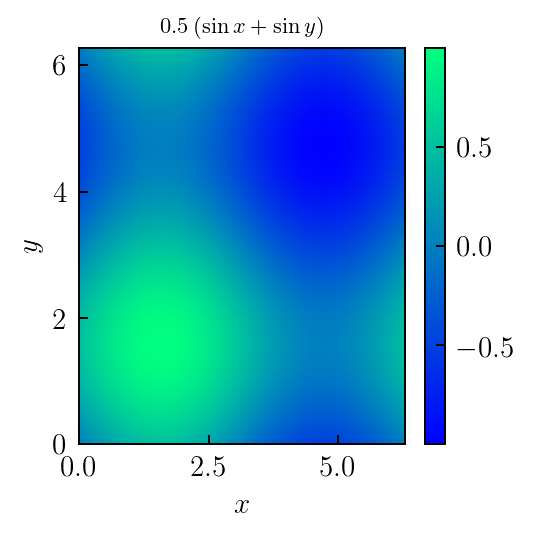

In [11]:
from codes.plot_utils import plot_color_map

plot_color_map(xgt, ygt, ft, xlim=[xmin,xmax], ylim=[xmin,xmax], 
                   xlabel = '$x$', ylabel = '$y$', cmap='winter', colorbar=True, 
                   plot_title=r'$0.5\,(\sin x+\sin y)$', 
                   figsize=3.0)


**Task 2b (15 points).** Although there is no convenient Scipy routine for polynomial interpolation in 2d, we can use the same approach as was used in Task 1a to construct interpolating polynomial in 2d, as is done in the following routine (a modified version of the routine provided <a href="https://stackoverflow.com/questions/33964913/equivalent-of-polyfit-for-a-2d-polynomial-in-python">here</a>). 

Write a routine that constructs 2D *polynomial* approximation of $\tilde{d}_L(z,\Omega_{\rm m0}, \Omega_\Lambda)$ for a given input single value of redshift $z$ and for ranges of the $\Omega_{\rm m0}$ and $\Omega_\Lambda)$ parameters of $\Omega_{\rm m0}\in [0.1]$ and $\Omega_\Lambda\in[0.,1]$. Just like for the spline in 2a, experiment with different training point spacings (for example, evenly spaced vs Chebyshev nodes) and try to find the spacing that reaches the target fractional accuracy of $10^{-4}$ with the smallest size of the training set. 

State your conclusions about the optimal method for approximating $\tilde{d}_L(z,\Omega_{\rm m0}, \Omega_\Lambda)$ supporting it with tests of fractional accuracy and plots, as needed. Each of the groups will make a brief presentation of their results in class Friday of next week.

In [12]:
def polyfit2d(xtr, ytr, ftr, kx=3, ky=3, order=None):
    '''
    Two dimensional polynomial fitting by least squares.
    Fits the functional form f(x,y) = z.

    Notes
    -----
    Resulting fit can be plotted with:
    np.polynomial.polynomial.polygrid2d(x, y, soln.reshape((kx+1, ky+1)))

    Parameters:
    ----------
    xtr, ytr: array-like, 1d
        xtr and ytr coordinates.
    ftr: 2d numpy array
        f(xgtr, ygtr) values evaluated on meshgrid of xtr and ytr vectors to fit by polynomial
    kx, ky: int, default is 3
        Polynomial order in x and y, respectively.
    order: int or None, default is None
        If None, all coefficients up to maxiumum kx, ky, ie. up to and including x^kx*y^ky, are considered.
        If int, coefficients up to a maximum of kx+ky <= order are considered.

    Returns:
    -------
    Return paramters from np.linalg.lstsq.

    soln: np.ndarray
        Array of polynomial coefficients.
    residuals: np.ndarray
    rank: int
    s: np.ndarray

    '''

    # grid coords
    x, y = np.meshgrid(xtr, ytr)
    # coefficient array, up to x^kx, y^ky
    coeffs = np.ones((kx+1, ky+1))

    # solve array
    V = np.zeros((coeffs.size, x.size))

    # construct Vandermonde matrix: for each coefficient produce array x^i, y^j
    for index, (j, i) in enumerate(np.ndindex(coeffs.shape)):
        # do not include powers greater than order
        if order is not None and i + j > order:
            arr = np.zeros_like(x)
        else:
            arr = coeffs[i, j] * x**i * y**j
        V[index] = arr.flatten()
        
    # do leastsq fitting and return leastsq result
    return np.linalg.lstsq(V.T, np.ravel(ftr), rcond=None)[0]

In [13]:
# be careful with polynomial order, results quickly become unstable as order increases
px, py = 7, 7 # polynomial order in x and y direction

# get coefficients of best 2d polynomial
a = polyfit2d(xtr, ytr, ftr, kx=px, ky=py, order=None)

In [14]:
# compute polynomial values on the grid of test points
ff = np.polynomial.polynomial.polyval2d(xgt, ygt, a.reshape((px+1,py+1)))

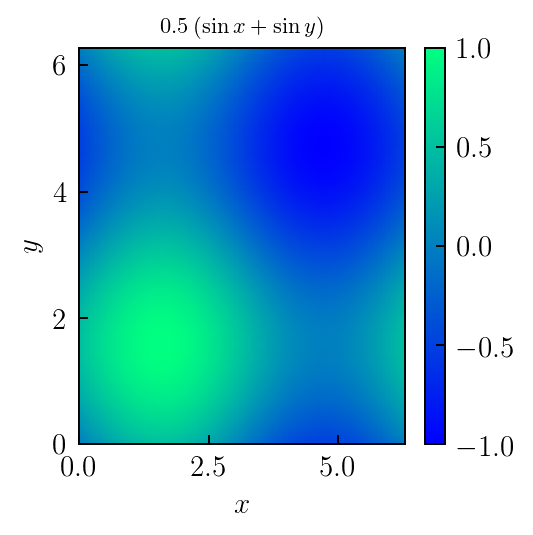

In [15]:
# plot approximating polynomial
plot_color_map(xgt, ygt, ff, xlim=[xmin,xmax], ylim=[xmin,xmax], 
                   xlabel = '$x$', ylabel = '$y$', cmap='winter', colorbar=True, 
                   plot_title=r'$0.5\,(\sin x+\sin y)$', 
                   figsize=3.0)

### Exercise 3 (extra-credit, 10 points): implementing spline interpolation as a Python class

Implementing a spline routine as a python class. In this exercise you would learn (or practice) object-oriented programming in python, which is particularly suited for this task. To learn how classes are defined and used in Python, see <a href="https://www.python-course.eu/python3_object_oriented_programming.php">this tutorial</a> or ask instructor or TAs.  

**Task.** Using the routines for calculation of spline coefficient vectors <tt>a, b, c, d</tt> and then the calculation of the actual spline values for an arbitrary input vector $x$  provided in this notebook above (routines <tt>cubic_spline_coefficients</tt> and <tt>cubic_spline</tt>) implement a class for spline interpolation that can be initialized and then used for an arbitrary input vector, similar to the way SciPy routines <a href="https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.interpolate.interp1d.html"><tt>interp1d</tt></a> and <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html"><tt>UnivariateSpline</tt></a> are used.  